In [1]:
#importing packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/big-mart-sales/Test-Set.csv
/kaggle/input/big-mart-sales/Train-Set.csv


In [2]:
df = pd.read_csv("/kaggle/input/big-mart-sales/Train-Set.csv")

## Getting the overview

In [3]:
# getting the first 5 rows

df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# shape of the data

df.shape

(8523, 12)

In [5]:
# getting the overview 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType', 'OutletType']
Numerical Columns: ['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear', 'OutletSales']


In [8]:
# checking duplicate values

df.duplicated().sum()

0

In [9]:
# getting the percentage of null data

df.isnull().mean()*100

ProductID             0.000000
Weight               17.165317
FatContent            0.000000
ProductVisibility     0.000000
ProductType           0.000000
MRP                   0.000000
OutletID              0.000000
EstablishmentYear     0.000000
OutletSize           28.276428
LocationType          0.000000
OutletType            0.000000
OutletSales           0.000000
dtype: float64

## Handeling the null values

In [10]:
# weight is numerical so we can checking its mean

df['Weight'].mean()

12.857645184135976

In [11]:
# filling the missing weight column with mean value

df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [12]:
# getting the outlet size categories

df["OutletSize"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
# as the outlet size is category , getting the mode of the outlet size

df['OutletSize'].mode()

0    Medium
Name: OutletSize, dtype: object

In [14]:
# filling the missing outletsize column with mode value

df['OutletSize'] = df['OutletSize'].fillna(df['OutletSize'].mode()[0])

In [15]:
# checking if the nulls are updated

df.isnull().mean()*100

ProductID            0.0
Weight               0.0
FatContent           0.0
ProductVisibility    0.0
ProductType          0.0
MRP                  0.0
OutletID             0.0
EstablishmentYear    0.0
OutletSize           0.0
LocationType         0.0
OutletType           0.0
OutletSales          0.0
dtype: float64

## Handeling the outliers

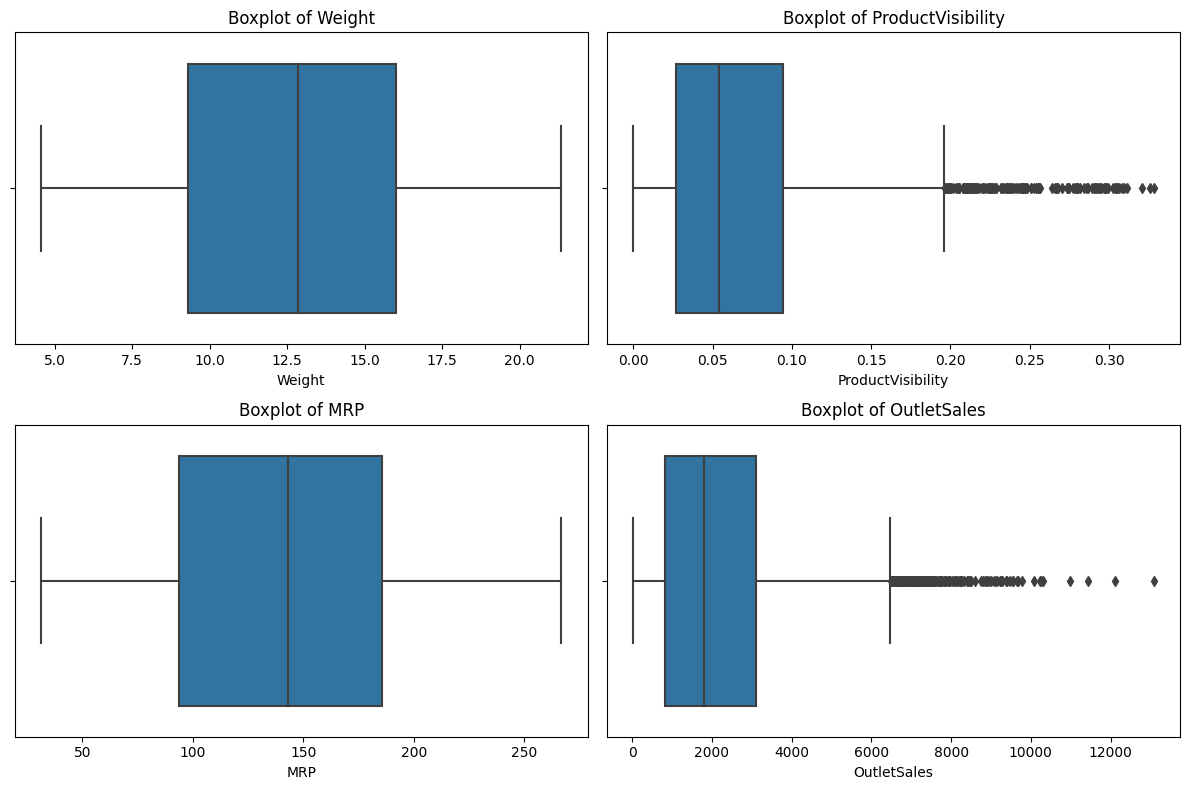

In [16]:
# checking for outliers

# List of numeric columns to visualize
numeric_cols = ['Weight', 'ProductVisibility', 'MRP', 'OutletSales']

# Plotting boxplots for each numeric column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 subplot grid
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

### OutletSales outliers 

In [17]:
df['OutletSales'].skew()

1.1775306028542796

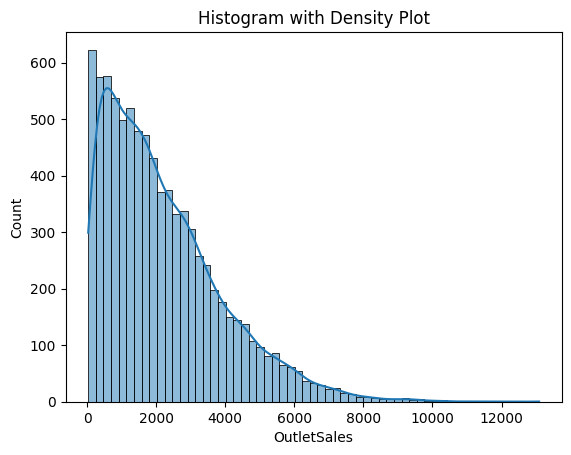

In [18]:
# Histogram and density plot
sns.histplot(df['OutletSales'], kde=True)
plt.title('Histogram with Density Plot')
plt.show()

In [19]:
# as the data is right skewed we are going to use iqr method to remove outliers

outletsales_Q1 = df['OutletSales'].quantile(0.25)  # 1st Quartile (25th percentile)
outletsales_Q3 = df['OutletSales'].quantile(0.75)  # 3rd Quartile (75th percentile)
outletsales_IQR = outletsales_Q3 - outletsales_Q1                     # Interquartile Range

print(f"Q1: {outletsales_Q1}, Q3: {outletsales_Q3}, IQR: {outletsales_IQR}")

Q1: 834.2474, Q3: 3101.2964, IQR: 2267.049


In [20]:
outletsales_upper_limit = outletsales_Q3 + 1.5*outletsales_IQR 
outletsales_lower_limit = outletsales_Q1 - 1.5*outletsales_IQR

print(f"Upper limit = {outletsales_upper_limit}")
print(f"Lower limit = {outletsales_lower_limit}")

Upper limit = 6501.8699
Lower limit = -2566.3261


In [21]:
df[df["OutletSales"]>outletsales_upper_limit]

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
43,FDC02,21.350000,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,12.857645,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,12.857645,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.600000,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,12.857645,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.200000,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,12.857645,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.000000,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.350000,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,Medium,Tier 2,Supermarket Type1,7588.1226


In [22]:
df[df["OutletSales"]<outletsales_lower_limit] #No data lower limit as the lower_limit value is in negative

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales


In [23]:
# as the dataset is less and sales data is meaningfull so we will use capping method

df["OutletSales"] = np.where(
    df["OutletSales"] > outletsales_upper_limit , outletsales_upper_limit ,
    np.where(df["OutletSales"]< outletsales_lower_limit , outletsales_lower_limit,df["OutletSales"])
)

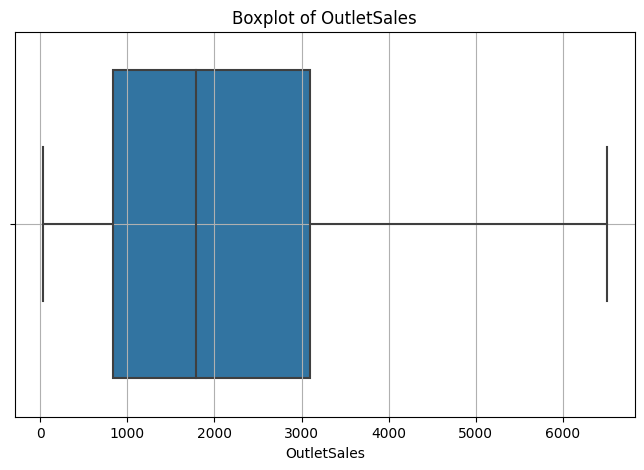

In [24]:
# checking if outliers are removed

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["OutletSales"])
plt.title("Boxplot of OutletSales")
plt.xlabel("OutletSales")
plt.grid(True)
plt.show()

### ProductVisibility outliers

In [25]:
df["ProductVisibility"].skew()

1.1670905496918396

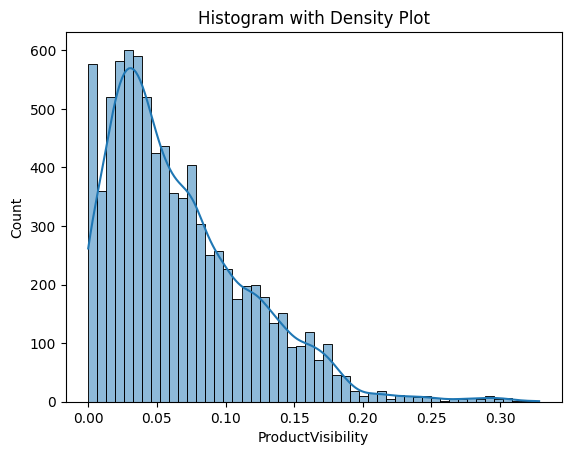

In [26]:
# Histogram and density plot
sns.histplot(df['ProductVisibility'], kde=True)
plt.title('Histogram with Density Plot')
plt.show()

In [27]:
# as the data is right skewed we are going to use iqr method to remove outliers

productvisibility_Q1 = df['ProductVisibility'].quantile(0.25)  # 1st Quartile (25th percentile)
productvisibility_Q3 = df['ProductVisibility'].quantile(0.75)  # 3rd Quartile (75th percentile)
productvisibility_IQR = productvisibility_Q3 - productvisibility_Q1                     # Interquartile Range

print(f"Q1: {productvisibility_Q1}, Q3: {productvisibility_Q3}, IQR: {productvisibility_IQR}")

Q1: 0.0269894775, Q3: 0.0945852925, IQR: 0.067595815


In [28]:
productvisibility_upper_limit = productvisibility_Q3 + 1.5*productvisibility_IQR 
productvisibility_lower_limit = productvisibility_Q1 - 1.5*productvisibility_IQR

print(f"Upper limit = {productvisibility_upper_limit}")
print(f"Lower limit = {productvisibility_lower_limit}")

Upper limit = 0.195979015
Lower limit = -0.07440424500000001


In [29]:
df[df["ProductVisibility"]>productvisibility_upper_limit]

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
49,FDS02,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
83,NCL18,12.857645,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DRE60,12.857645,low fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,FDI32,17.700000,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Medium,Tier 3,Grocery Store,345.5502
334,FDC41,12.857645,Low Fat,0.204700,Frozen Foods,76.8670,OUT019,1985,Small,Tier 1,Grocery Store,229.7010
...,...,...,...,...,...,...,...,...,...,...,...,...
8292,FDF56,12.857645,Regular,0.209163,Fruits and Vegetables,179.1976,OUT019,1985,Small,Tier 1,Grocery Store,543.2928
8345,FDY28,12.857645,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654
8371,DRA59,8.270000,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,Medium,Tier 3,Grocery Store,185.0924
8432,FDI16,14.000000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Medium,Tier 3,Grocery Store,159.7920


In [30]:
df[df["ProductVisibility"]<outletsales_lower_limit]

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales


In [31]:
# as the dataset is less and sales data is meaningfull so we will use capping method

df["ProductVisibility"] = np.where(
    df["ProductVisibility"] > productvisibility_upper_limit , productvisibility_upper_limit ,
    np.where(df["ProductVisibility"]< productvisibility_lower_limit , productvisibility_lower_limit,df["ProductVisibility"])
)

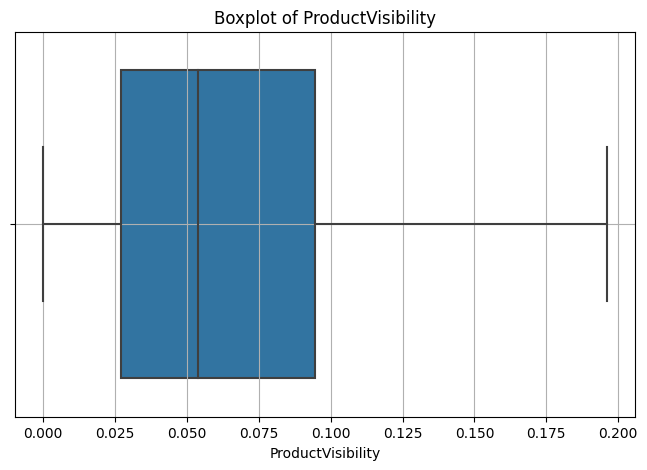

In [32]:
# checking if outliers are removed

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["ProductVisibility"])
plt.title("Boxplot of ProductVisibility")
plt.xlabel("ProductVisibility")
plt.grid(True)
plt.show()

## Data Visualisation

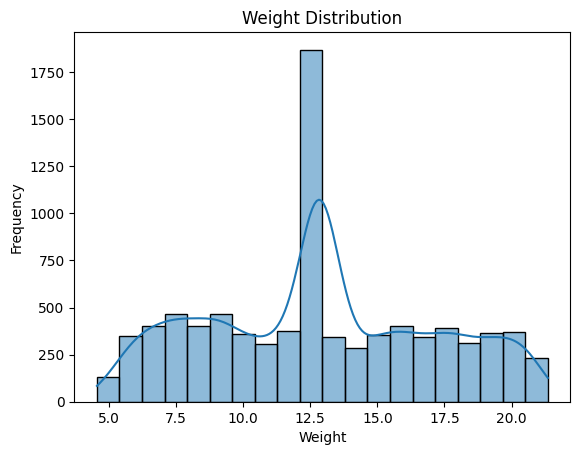

In [33]:
sns.histplot(data=df, x='Weight', bins=20, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [34]:
skewness_value = skew(df['Weight'])
print(f"Skewness: {skewness_value}")

Skewness: 0.09054551283291795


As there is no skewness, we dont need to transform the data

In [35]:
df['FatContent'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [36]:
df['FatContent'] = df['FatContent'].replace({
    'reg': 'Regular',  # Replace 'reg' with 'Regular'
    'LF': 'Low Fat',   # Replace 'LF' with 'Low Fat'
    'low fat': 'Low Fat'  # Replace 'low fat' with 'Low Fat'
})

df['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

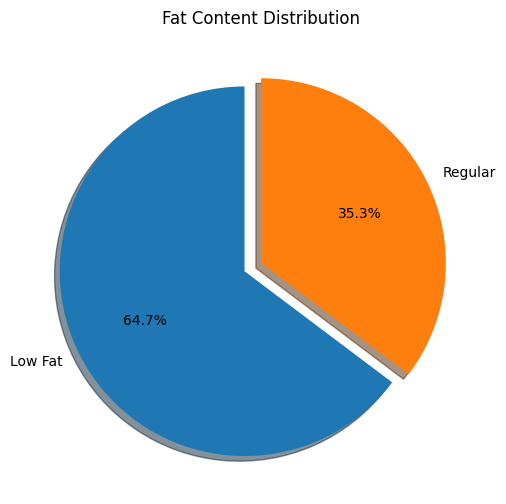

In [37]:
# Get value counts for the 'FatContent' column
fat_content_counts = df['FatContent'].value_counts()

# Prepare data for pie chart
y = fat_content_counts
mylabels = fat_content_counts.index
myexplode = (0.1, 0)  # Explode the first slice (e.g., 'Low Fat')

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(y, labels=mylabels, explode=myexplode, shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Fat Content Distribution')
plt.show()

In [38]:
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [39]:
df['OutletID'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

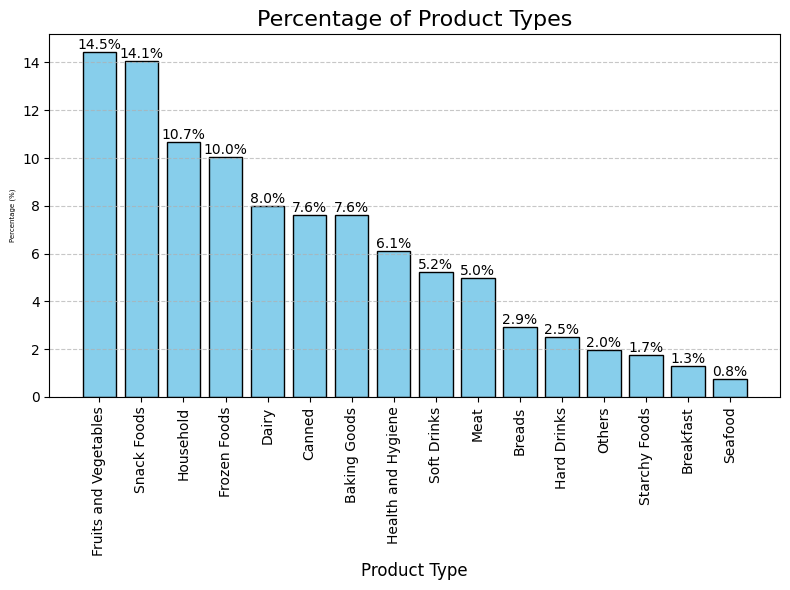

In [40]:
# Calculate the percentage of each category
percentages = df['ProductType'].value_counts(normalize=True) * 100

# Plot the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(percentages.index, percentages, color='skyblue', edgecolor='black')

# Add percentages above each bar
for bar, percentage in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height(),  # Y-coordinate (top of the bar)
        f'{percentage:.1f}%',  # Percentage text
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10  # Font size
    )

# Add titles and labels
plt.title('Percentage of Product Types', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=5)
plt.xlabel('Product Type', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
df.groupby('LocationType')['OutletID'].nunique()

LocationType
Tier 1    3
Tier 2    3
Tier 3    4
Name: OutletID, dtype: int64

In [42]:
df.groupby('OutletSize')['OutletID'].nunique()

OutletSize
High      1
Medium    6
Small     3
Name: OutletID, dtype: int64

## Data Preprocessing

In [43]:
df.head(1)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [44]:
categorical_columns = ["ProductID","FatContent","ProductType","OutletSize","LocationType","OutletType","OutletID"]

for i in categorical_columns:
    print(f"{i} : {len(df[i].unique())}")

ProductID : 1559
FatContent : 2
ProductType : 16
OutletSize : 3
LocationType : 3
OutletType : 4
OutletID : 10


In [45]:
# Initialize BinaryEncoder
encoder = BinaryEncoder(cols=["ProductID","FatContent","ProductType","OutletSize","LocationType","OutletType","OutletID"])

# Transform the DataFrame
df = encoder.fit_transform(df)
df.head()

,ProductID_0,ProductID_1,ProductID_2,ProductID_3,ProductID_4,ProductID_5,ProductID_6,ProductID_7,ProductID_8,ProductID_9,...,OutletID_3,EstablishmentYear,OutletSize_0,OutletSize_1,LocationType_0,LocationType_1,OutletType_0,OutletType_1,OutletType_2,OutletSales
0,0,0,0,0,0,0,0,0,0,0,...,1,1999,0,1,0,1,0,0,1,3735.1380
1,0,0,0,0,0,0,0,0,0,1,...,0,2009,0,1,1,0,0,1,0,443.4228
2,0,0,0,0,0,0,0,0,0,1,...,1,1999,0,1,0,1,0,0,1,2097.2700
3,0,0,0,0,0,0,0,0,1,0,...,1,1998,0,1,1,0,0,1,1,732.3800
4,0,0,0,0,0,0,0,0,1,0,...,0,1987,1,0,1,0,0,0,1,994.7052


In [46]:
df.columns

Index(['ProductID_0', 'ProductID_1', 'ProductID_2', 'ProductID_3',
       'ProductID_4', 'ProductID_5', 'ProductID_6', 'ProductID_7',
       'ProductID_8', 'ProductID_9', 'ProductID_10', 'Weight', 'FatContent_0',
       'FatContent_1', 'ProductVisibility', 'ProductType_0', 'ProductType_1',
       'ProductType_2', 'ProductType_3', 'ProductType_4', 'MRP', 'OutletID_0',
       'OutletID_1', 'OutletID_2', 'OutletID_3', 'EstablishmentYear',
       'OutletSize_0', 'OutletSize_1', 'LocationType_0', 'LocationType_1',
       'OutletType_0', 'OutletType_1', 'OutletType_2', 'OutletSales'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID_0        8523 non-null   int64  
 1   ProductID_1        8523 non-null   int64  
 2   ProductID_2        8523 non-null   int64  
 3   ProductID_3        8523 non-null   int64  
 4   ProductID_4        8523 non-null   int64  
 5   ProductID_5        8523 non-null   int64  
 6   ProductID_6        8523 non-null   int64  
 7   ProductID_7        8523 non-null   int64  
 8   ProductID_8        8523 non-null   int64  
 9   ProductID_9        8523 non-null   int64  
 10  ProductID_10       8523 non-null   int64  
 11  Weight             8523 non-null   float64
 12  FatContent_0       8523 non-null   int64  
 13  FatContent_1       8523 non-null   int64  
 14  ProductVisibility  8523 non-null   float64
 15  ProductType_0      8523 non-null   int64  
 16  ProductType_1      8523 

In [49]:
#defining x and y axis

x= df.drop(['OutletSales'],axis=1).values
y= df['OutletSales'].values

#splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size= 0.20, random_state=10)

In [51]:
#scaling of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [53]:
def get_regression_metrics(y_true,y_pred):
  """
  Get regression metrics for a given set of true and predicted values.

  Args:
    y_true: The true values.
    y_pred: The predicted values.

  Returns:
    A table containing the following metrics:
      * R score: The coefficient of determination.
      * Adjusted R score: The adjusted coefficient of determination.
      * MSE: The mean squared error.
      * RMSE: The root mean squared error.
      * MAE: The mean absolute error.
  """
  metrics = {}
  metrics["R score"] = r2_score(y_true, y_pred)
  metrics["Adjusted R score"] = 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true)-1) / (len(y_true) - x_test.shape[1] - 1)
  metrics["MSE"] = mean_squared_error(y_true, y_pred)
  metrics["RMSE"] = np.sqrt(mean_squared_error(y_true, y_pred))
  metrics["MAE"] = mean_absolute_error(y_true, y_pred)

  return metrics

In [54]:
#linear regression

#applying LinerRegression and fitting the model
liner_r = LinearRegression()
liner_r.fit(x_train_scaled,y_train)

#predicting the model
y_predict_linear_regression = liner_r.predict(x_test_scaled)

#getting the regression metrix
print(get_regression_metrics(y_test,y_predict_linear_regression))

{'R score': 0.59085612773512, 'Adjusted R score': 0.5827760871697454, 'MSE': 1086379.313736244, 'RMSE': 1042.2952142921142, 'MAE': 799.602882170088}
